**Project 2**

Team:

Khyati Kaik


Laura Puebla

**Instructions:**

1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

3. What can you infer about each of the distinct groups

Information about this data:

The Caenorhabditis elegans worm’s neural network

This dataset contains the neural network of the Caenorhabditis elegans worm (C.elegans). It was studied by Watts and Strogatz (1998). The network contains 306 nodes that represent neurons. Two neurons are connected if at least one synapse or gap junction exist between them. The weight is the number of synapses and gap junctions. This network was obtained from the Collective Dynamics Group’s website. [Dataset](https://https://toreopsahl.com/datasets/#online_forum_network)



In [1]:
#Importing libraries
import networkx as net
import csv
import pandas as pd
import requests
import io
import math
import community
import numpy as np
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
%matplotlib inline

request = requests.get("http://opsahl.co.uk/tnet/datasets/celegans_n306.txt").content
data = pd.read_csv(io.StringIO(request.decode('utf-8')))

In [2]:
#Naming columns
data[['n1', 'n2', 'weight']] = data['1 51 1'].str.split(' ', expand = True)

In [3]:
data.head()

,1 51 1,n1,n2,weight
0,1 72 2,1,72,2
1,1 77 1,1,77,1
2,1 78 2,1,78,2
3,1 2 1,1,2,1
4,1 90 6,1,90,6


In [4]:
data

,1 51 1,n1,n2,weight
0,1 72 2,1,72,2
1,1 77 1,1,77,1
2,1 78 2,1,78,2
3,1 2 1,1,2,1
4,1 90 6,1,90,6
...,...,...,...,...
2339,298 305 1,298,305,1
2340,299 305 1,299,305,1
2341,300 305 1,300,305,1
2342,301 306 1,301,306,1


In [5]:
#Dropping unnecessary columns
data = data.drop('1 51 1', axis =1)

In [6]:
data

,n1,n2,weight
0,1,72,2
1,1,77,1
2,1,78,2
3,1,2,1
4,1,90,6
...,...,...,...
2339,298,305,1
2340,299,305,1
2341,300,305,1
2342,301,306,1


In [7]:
len(request)

21640

In [8]:
# Entering data as nodes and edges

fb_csv = csv.reader(open('authors.csv'))

n1 = []
n2 = []
fb_g = net.Graph()

for row in fb_csv:
    if row[0] not in n1:
        n1.append(row[0])
    if row[1] not in n2:
        n2.append(row[1])
    fb_g.add_edge(row[0], row[1], weight = row[2])

In [9]:
fb_g

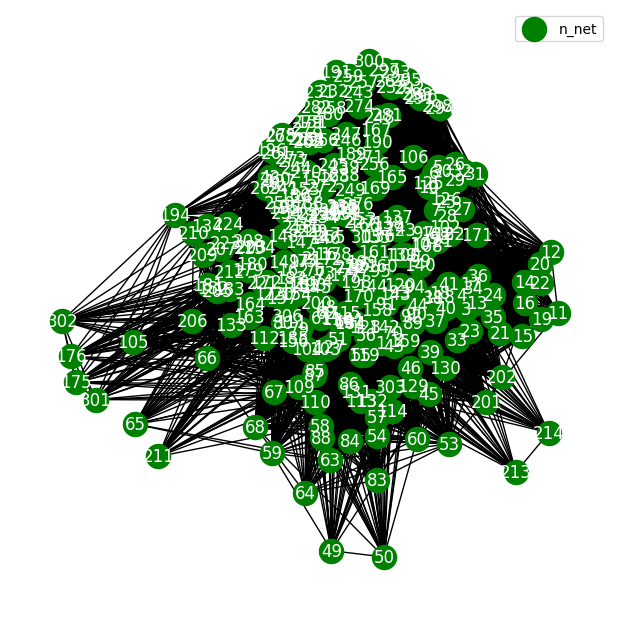

In [11]:
# Subgraph of n1

plt.figure(figsize=(6,6))

n1_net = bi.weighted_projected_graph(fb_g, n1, ratio=False)

n1_net2 = max(net.connected_components(n1_net),key=len)

weights = [math.log(edata['weight'])for f,t,edata in n1_net.edges(data=True)]

net.draw_spring(n1_net, label = 'n_net', node_color='g', with_labels=True, node_size =300, font_color ='w')
plt.legend(["n_net"])
plt.show()


In [12]:
len(n1_net2)

297

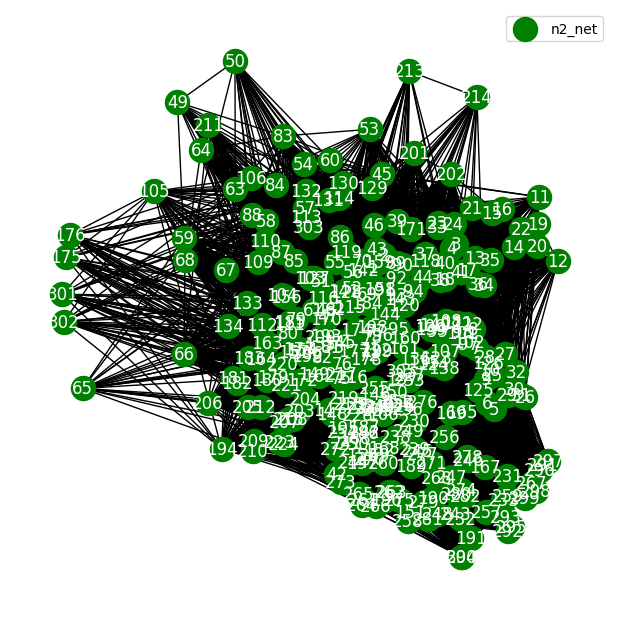

In [13]:
# Subgraph of n2

plt.figure(figsize=(6,6))

n2_net = bi.weighted_projected_graph(fb_g, n2, ratio=False)

n2_net2 = max(net.connected_components(n2_net),key=len)

weights = [math.log(edata['weight'])for f,t,edata in n2_net.edges(data=True)]

net.draw_spring(n2_net, label = 'author_net2', node_color='g', with_labels=True, node_size =300, font_color ='w')
plt.legend(["n2_net"])
plt.show()

In [14]:
len(n2_net2)

297

Trimming network

In [15]:
# Trimming edges based on edge weight
def trim_edges(fb_g, weight=1):
    fb_g2 = net.Graph()
    for f, to, edata in fb_g.edges(data=True):
        if int(edata['weight']) > weight:
            fb_g2.add_edge(f,to)
    return fb_g2

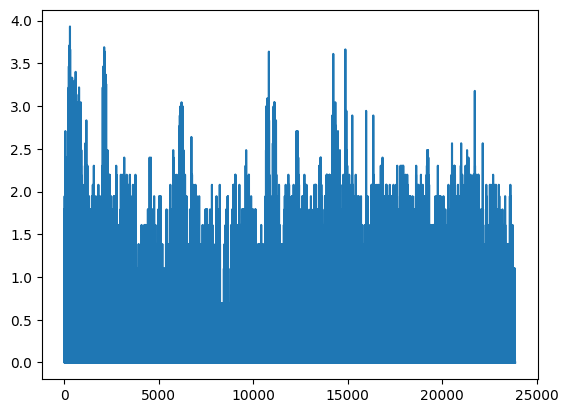

In [16]:
plt.plot(weights)

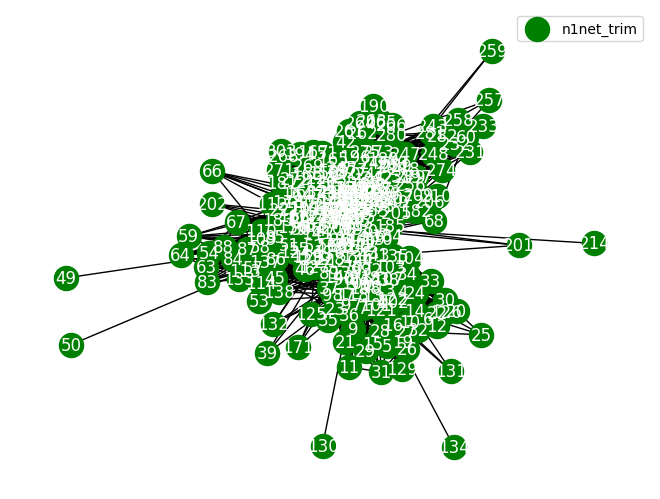

In [17]:
# Trimming the n1 network
n1net_trim = trim_edges(n1_net,weight= math.exp(0.99))
#weights = [edata['weight'] for f,t, edata in authornet_trim.edges(data=True)]

net.draw_spring(n1net_trim, label = 'n1net_trim', node_color='g',with_labels=True,node_size =300,font_color ='w')
plt.legend(["n1net_trim"])
plt.show()

In [18]:
len(n1net_trim)

276

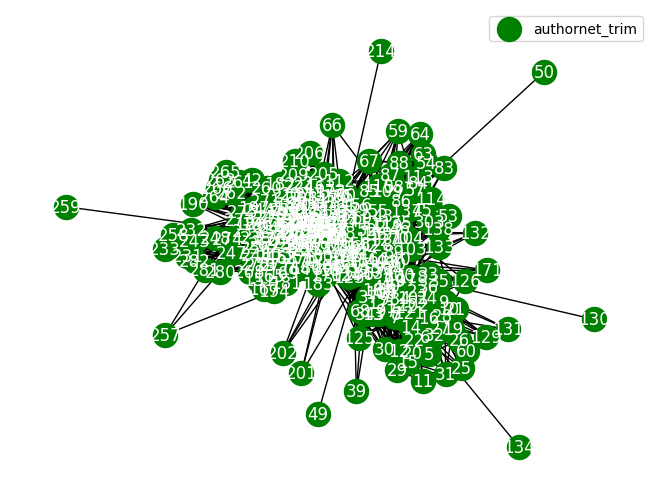

In [23]:
# Trimming the n2 network
nnet2_trim = trim_edges(n2_net,weight= math.exp(0.99))
#weights = [edata['weight'] for f,t, edata in authornet_trim.edges(data=True)]

net.draw_spring(nnet2_trim, label = 'authornet_trim', node_color='g',with_labels=True,node_size =300,font_color ='w')
plt.legend(["authornet_trim"])
plt.show()

In [25]:
len(nnet2_trim)

276

In [26]:
## Raising the water level based on min and max values
weights= [edata['weight'] for f,to, edata in n2_net.edges(data=True)]
mn = int(min(weights))
mx = int(max(weights))

Applying Island Method

In [36]:
# Island method for n1 network
def island_method(n1net_trim, iterations=10):
    step =((mx - mn)/iterations)
    return [[threshold, trim_edges(n2_net, threshold)] for threshold in np.arange(mn,mx,step)]

In [56]:
#cc = list(net.connected_components(n1net_trim))
#cc = list(net.connected_component_subgraphs(usernet_trim))
#A=list(B.subgraph(c) for c in nx.connected_components(B))[0]
cc=list(n1net_trim.subgraph(c) for c in net.connected_components(n1net_trim))
# Removing nodes with no edges
ccn=[]
j=0
for i in range(len(cc)):
    if (len(net.edges(cc[i]))!=0):
        ccn.insert(j,cc[i])
        j=j+1
len(ccn)

1

In [57]:
for i in range(len(ccn)) :
    islands = island_method(ccn[i])
    if islands is not None:
        for j in range(len(islands)):
            print ('Subgraph:',i, 'Weight :', islands[j][0] , '# Nodes:', len(net.nodes(islands[j][1])))

Subgraph: 0 Weight : 1.0 # Nodes: 281
Subgraph: 0 Weight : 6.0 # Nodes: 176
Subgraph: 0 Weight : 11.0 # Nodes: 51
Subgraph: 0 Weight : 16.0 # Nodes: 23
Subgraph: 0 Weight : 21.0 # Nodes: 13
Subgraph: 0 Weight : 26.0 # Nodes: 11
Subgraph: 0 Weight : 31.0 # Nodes: 9
Subgraph: 0 Weight : 36.0 # Nodes: 8
Subgraph: 0 Weight : 41.0 # Nodes: 2
Subgraph: 0 Weight : 46.0 # Nodes: 2


In [58]:
# Island method for n2 network
def island_method(nnet2_trim, iterations=10):
    step =((mx - mn)/iterations)
    return [[threshold, trim_edges(n2_net, threshold)] for threshold in np.arange(mn,mx,step)]

In [59]:
cc=list(nnet2_trim.subgraph(c) for c in net.connected_components(nnet2_trim))
# Removing nodes with no edges
ccn=[]
j=0
for i in range(len(cc)):
    if (len(net.edges(cc[i]))!=0):
        ccn.insert(j,cc[i])
        j=j+1
len(ccn)

1

In [32]:
for i in range(len(ccn)) :
    islands = island_method(ccn[i])
    if islands is not None:
        for j in range(len(islands)):
            print ('Subgraph:',i, 'Weight :', islands[j][0] , '# Nodes:', len(net.nodes(islands[j][1])))


Subgraph: 0 Weight : 1.0 # Nodes: 281
Subgraph: 0 Weight : 6.0 # Nodes: 176
Subgraph: 0 Weight : 11.0 # Nodes: 51
Subgraph: 0 Weight : 16.0 # Nodes: 23
Subgraph: 0 Weight : 21.0 # Nodes: 13
Subgraph: 0 Weight : 26.0 # Nodes: 11
Subgraph: 0 Weight : 31.0 # Nodes: 9
Subgraph: 0 Weight : 36.0 # Nodes: 8
Subgraph: 0 Weight : 41.0 # Nodes: 2
Subgraph: 0 Weight : 46.0 # Nodes: 2


Inferences

In [33]:
# Function defined sorted_map for sorting based on their centrality value
#sort_degree2 = sorted(degree.items(), key=lambda item: item[1])
def sorted_map(map):
    ms= sorted(map.items(),key=lambda item: item[1])
    return ms

In [34]:
# Is the n1 graph directed?
#cc=list(authornet_trim.subgraph(c) for c in net.connected_components(authornet_trim))
n1_ud = n1net_trim.to_undirected()
#fb_components = net.connected_component_subgraphs(author1_ud)
fb_components = list(n1net_trim.subgraph(c) for c in net.connected_components(n1_ud))
net.is_directed(n1_ud)

False

In [39]:
# Is the n2 graph directed?
n2_ud = nnet2_trim.to_undirected()
fb_components = list(nnet2_trim.subgraph(c) for c in net.connected_components(n2_ud))
net.is_directed(n2_ud)

False

In [40]:
pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
!pip uninstall community
import community.community_louvain as cl

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.10/dist-packages/community/community_status.py
Proceed (Y/n)? y
  Successfully uninstalled community-1.0.0b1


In [43]:
part = cl.best_partition(n1_ud)
mod = cl.modularity(part, n1_ud)

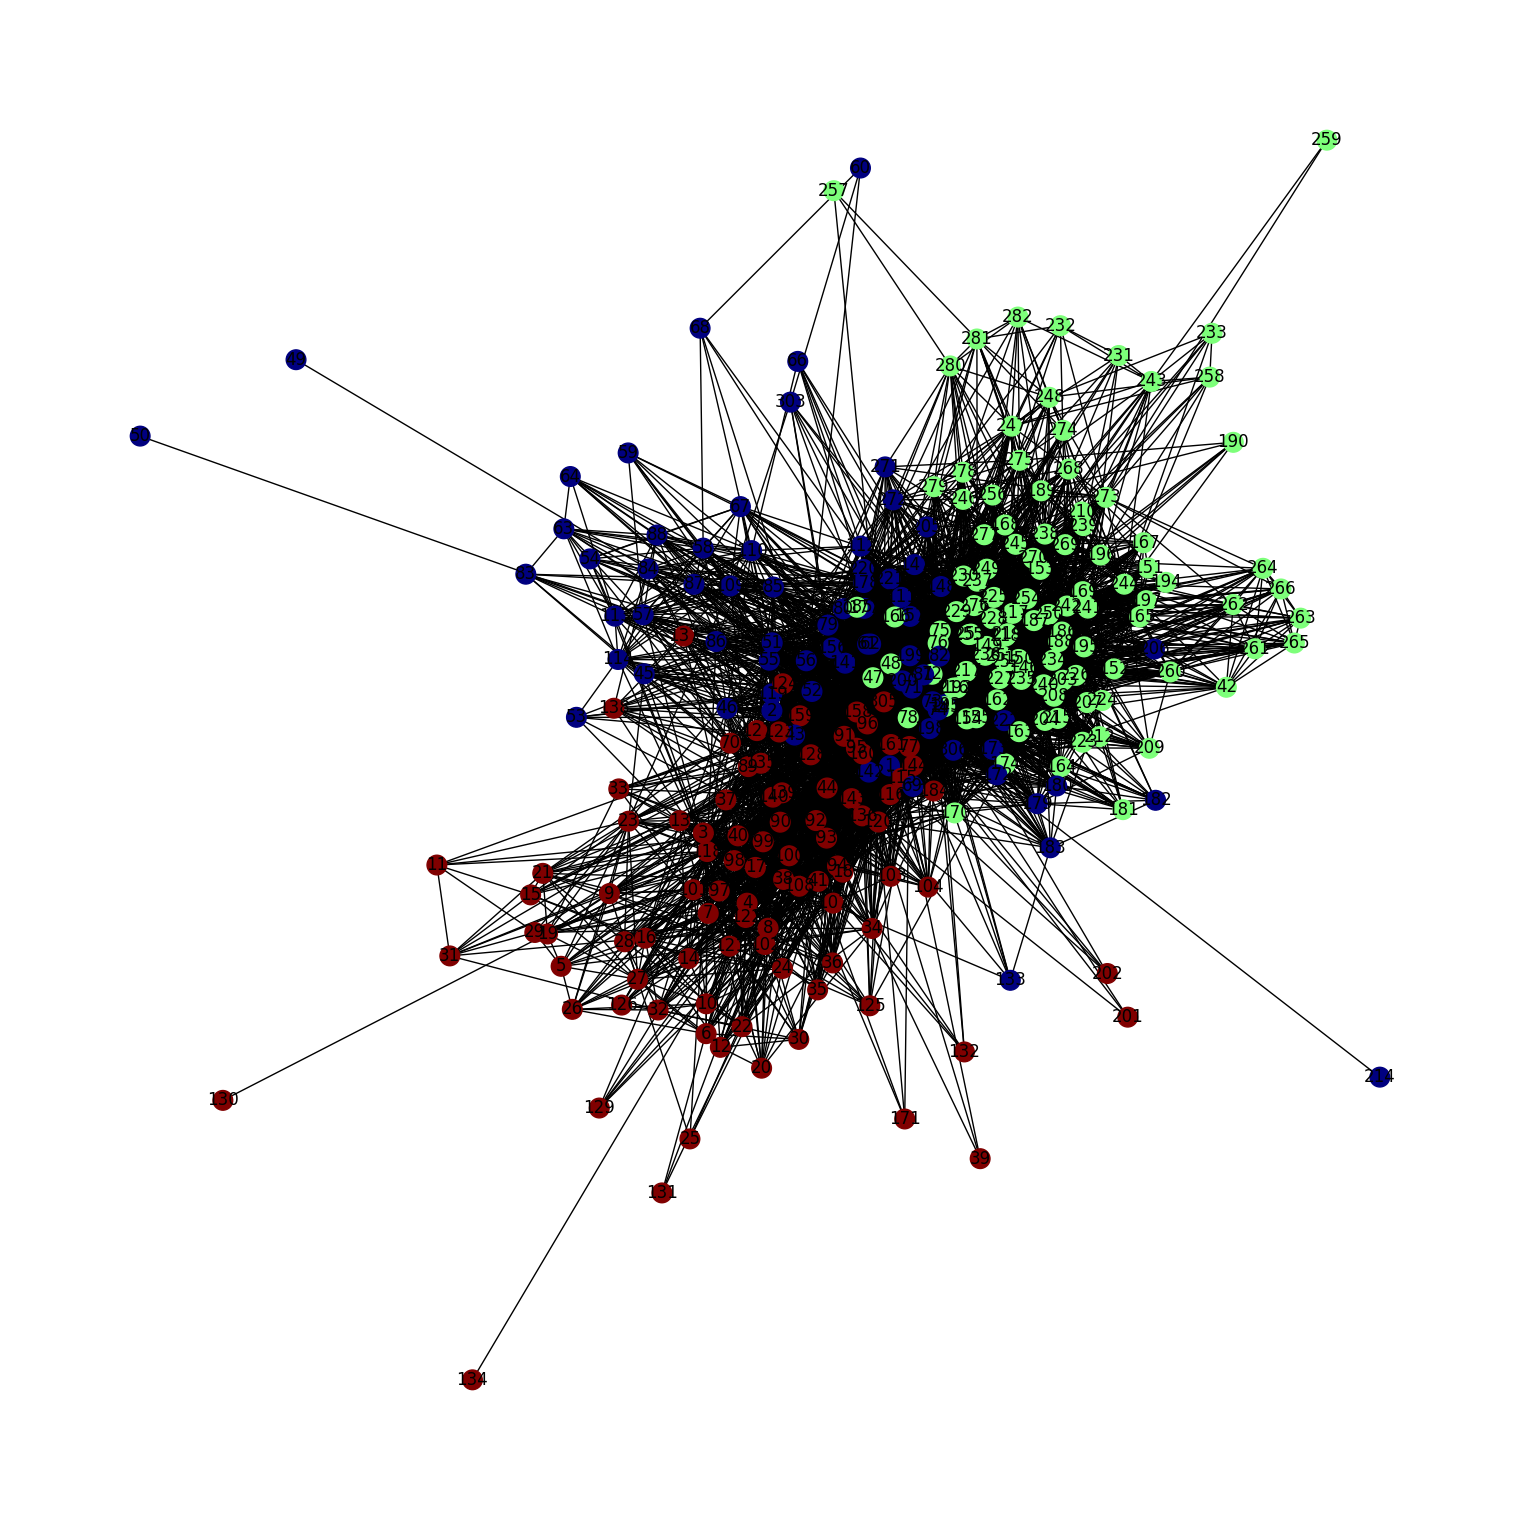

In [44]:
values = [part.get(node) for node in n1_ud.nodes()]
plt.figure(figsize=(15,15))
pos = net.drawing.spring_layout(n1_ud)
net.draw(n1_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

In [46]:
#Find Communities for n2
part1 = cl.best_partition(n2_ud)
mod1 = cl.modularity(part1, n2_ud)

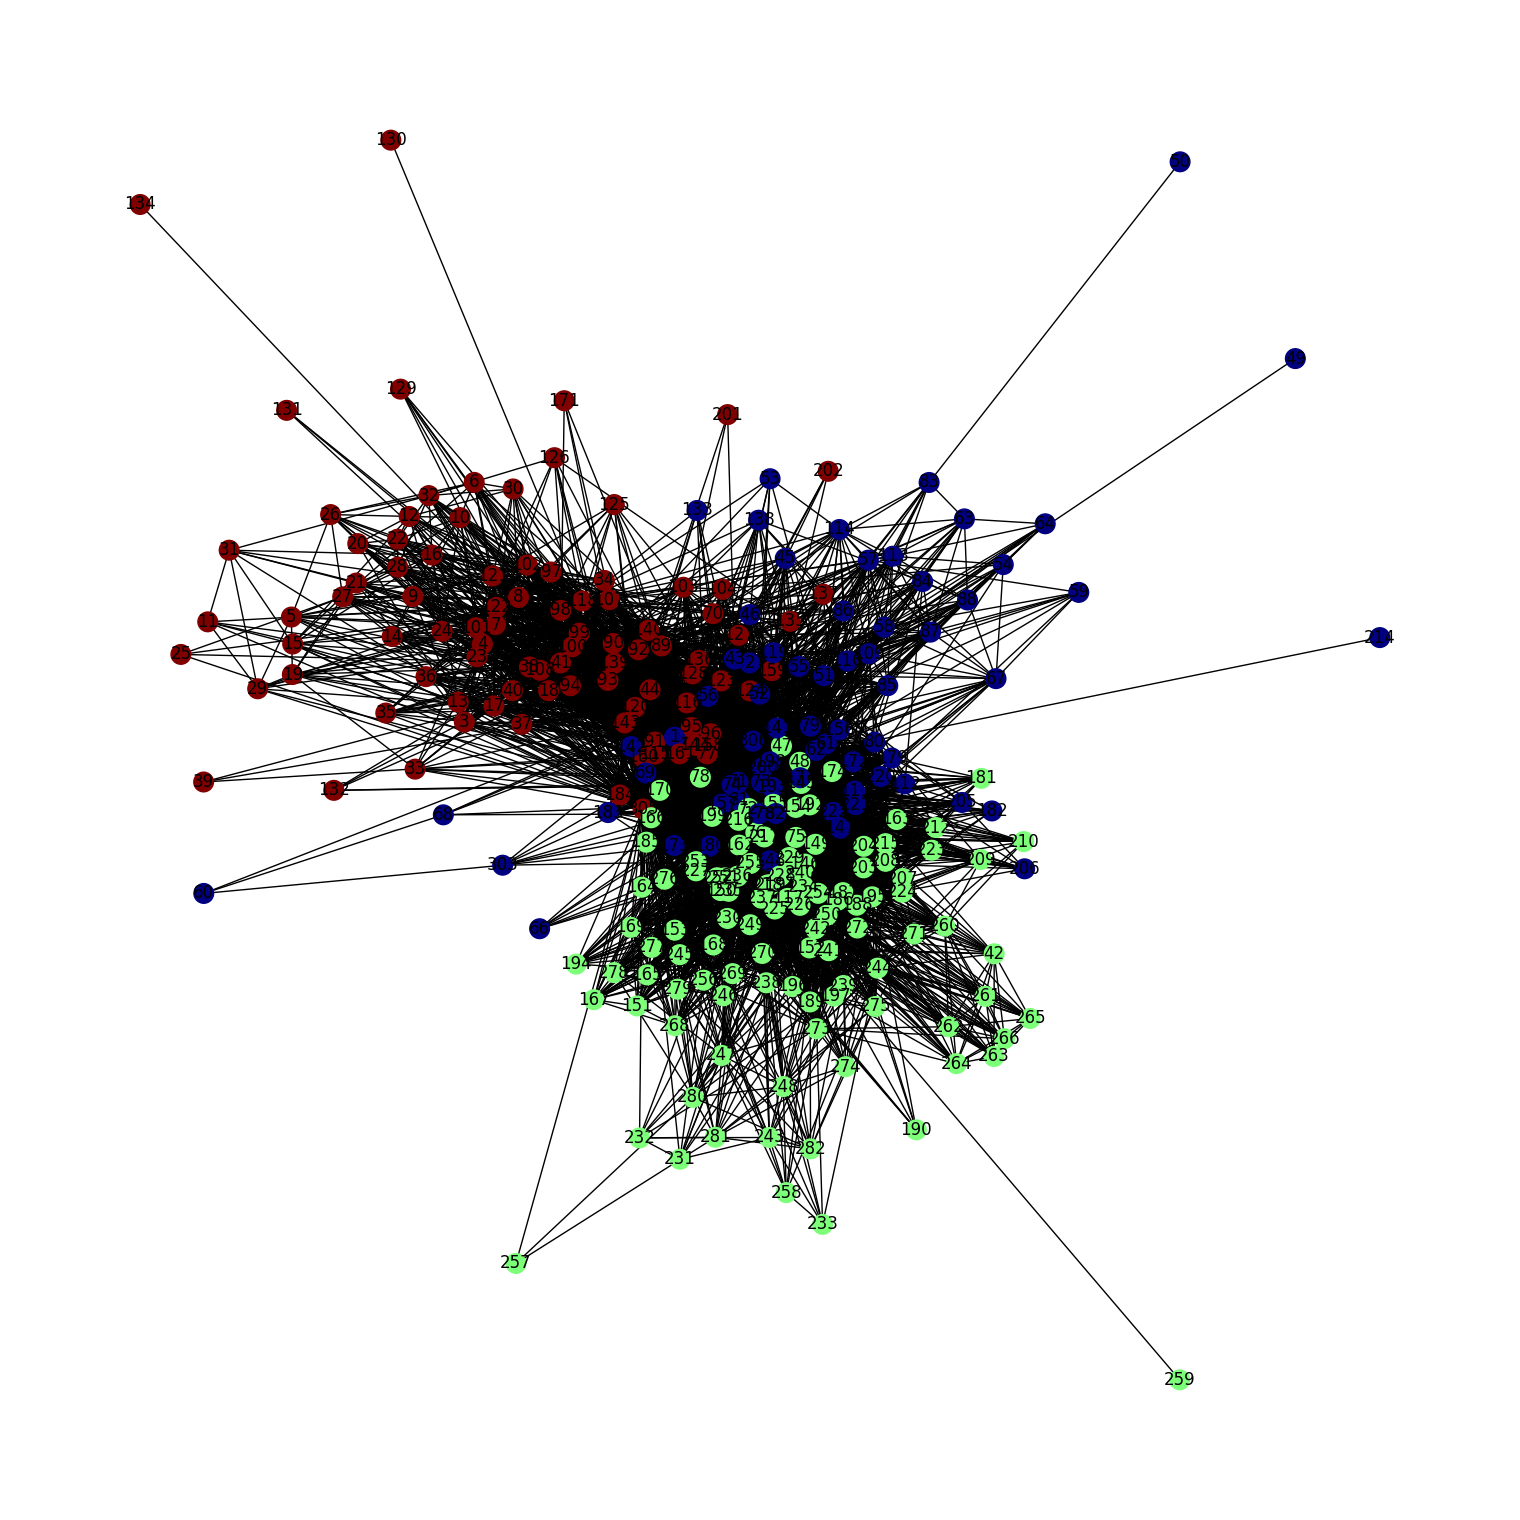

In [47]:
values = [part1.get(node) for node in n2_ud.nodes()]
plt.figure(figsize=(15,15))
pos = net.drawing.spring_layout(n2_ud)
net.draw(n2_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

In [62]:
# Examine node data to determine top n1 centralities
print(list(n1_ud.nodes(data=True))[0:5])

[('1', {}), ('51', {}), ('72', {}), ('77', {}), ('78', {})]


In [63]:
# Compute Degree Measure
d = net.degree(n1net_trim)
#ds = sorted_map(d)

In [64]:
n1_ud = fb_g
# Degree Centrality
dcent = net.degree_centrality(n1_ud)
dcent_s = sorted_map(dcent)

In [65]:
# Closeness Centrality
ccent = net.closeness_centrality(n1_ud)
ccent_s = sorted_map(ccent)

In [66]:
# Betweenness Centrality
bcent = net.betweenness_centrality(n1_ud)
bcent_s = sorted_map(bcent)

In [67]:
# Top 0 nodes for each Centrality
TopD = [item[0] for item in dcent_s[0:19]]
TopB = [item[0] for item in bcent_s[0:19]]
TopC = [item[0] for item in ccent_s[0:19]]
TopNodes = TopD + TopB + TopC

In [68]:
from prettytable import PrettyTable


names1=[x[0] for x in dcent_s[:19]]
names2=[x[0] for x in ccent_s[:19]]
names3=[x[0] for x in bcent_s[:19]]
names=list(set(names1)|set(names2)|set(names3))

table=[[name,n1_ud.degree(name),round(dcent[name],3),round(ccent[name],3),round(bcent[name],3)] for name in names]


table=sorted(table,key=lambda x: -x[4])
pt = PrettyTable(['Node','Degree','Degree Cent.','Closeness Cent.','Betweenness Cent.'])
for i in range(0, len(table)):
    pt.add_row(table[i])

print(pt)

+------+--------+--------------+-----------------+-------------------+
| Node | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. |
+------+--------+--------------+-----------------+-------------------+
|  53  |   8    |    0.027     |       0.34      |       0.002       |
|  60  |   6    |     0.02     |       0.34      |       0.001       |
|  83  |   7    |    0.024     |      0.333      |       0.001       |
| 176  |   1    |    0.003     |      0.294      |        0.0        |
| 295  |   1    |    0.003     |      0.375      |        0.0        |
| 211  |   1    |    0.003     |      0.326      |        0.0        |
|  49  |   4    |    0.014     |      0.292      |        0.0        |
| 213  |   3    |     0.01     |       0.33      |        0.0        |
| 299  |   1    |    0.003     |      0.375      |        0.0        |
| 293  |   1    |    0.003     |      0.375      |        0.0        |
|  59  |   6    |     0.02     |      0.326      |        0.0        |
| 175 

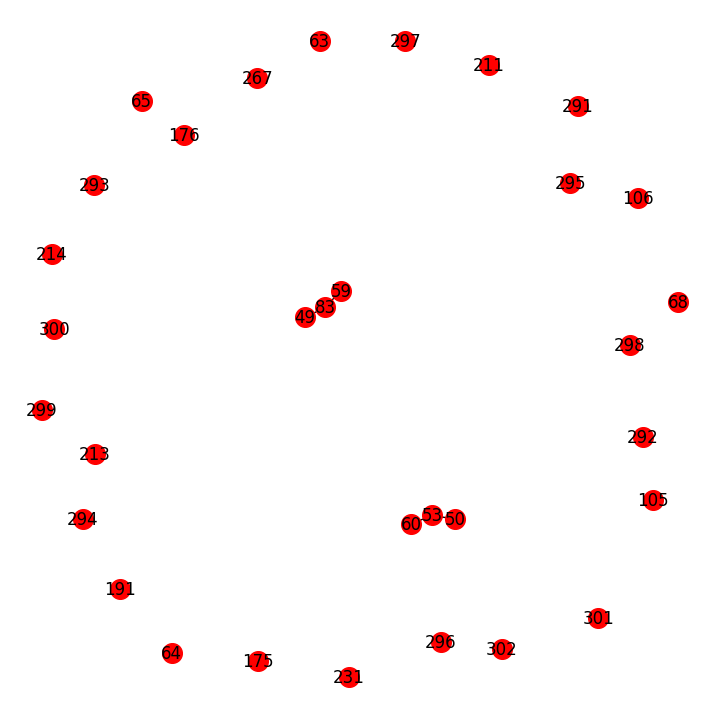

In [73]:
# Subgraph of Most Central Individuals
plt.figure(figsize=(7,7))
G = net.Graph(n1_ud)

nodes = G.nodes()
edges = G.edges()

H = net.path_graph(903)
H.add_nodes_from(G)
H.add_edges_from(G.edges())

H2 = H.subgraph(TopNodes)
#centralcenter = net.center(H2)
net.is_connected(G)
#connected_components(G)
components = list(H.subgraph(c) for c in net.connected_components(H))
net.draw(H2, with_labels=True, node_color = "r", node_size = 200)
#net.draw(n1_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

In [74]:
# Examine node data to determine top n2 centralities
print(list(n2_ud.nodes(data=True))[0:5])

[('51', {}), ('193', {}), ('2', {}), ('90', {}), ('49', {})]


In [75]:
# Compute Degree Measure
d = net.degree(nnet2_trim)
#ds = sorted_map(d)

In [77]:
# Degree Centrality
n2_ud = fb_g
dcent = net.degree_centrality(n2_ud)
dcent_s = sorted_map(dcent)

In [78]:
# Closeness Centrality
ccent = net.closeness_centrality(n2_ud)
ccent_s = sorted_map(ccent)

In [79]:
# Betweenness Centrality
bcent = net.betweenness_centrality(n2_ud)
bcent_s = sorted_map(bcent)

In [80]:
# Top 0 nodes for each Centrality
TopD = [item[0] for item in dcent_s[0:19]]
TopB = [item[0] for item in bcent_s[0:19]]
TopC = [item[0] for item in ccent_s[0:19]]
TopNodes = TopD + TopB + TopC


In [81]:
from prettytable import PrettyTable


names1=[x[0] for x in dcent_s[:19]]
names2=[x[0] for x in ccent_s[:19]]
names3=[x[0] for x in bcent_s[:19]]
names=list(set(names1)|set(names2)|set(names3))

table=[[name,n2_ud.degree(name),round(dcent[name],3),round(ccent[name],3),round(bcent[name],3)] for name in names]


table=sorted(table,key=lambda x: -x[4])
pt = PrettyTable(['Node','Degree','Degree Cent.','Closeness Cent.','Betweenness Cent.'])
for i in range(0, len(table)):
    pt.add_row(table[i])

print(pt)

+------+--------+--------------+-----------------+-------------------+
| Node | Degree | Degree Cent. | Closeness Cent. | Betweenness Cent. |
+------+--------+--------------+-----------------+-------------------+
|  53  |   8    |    0.027     |       0.34      |       0.002       |
|  60  |   6    |     0.02     |       0.34      |       0.001       |
|  83  |   7    |    0.024     |      0.333      |       0.001       |
| 176  |   1    |    0.003     |      0.294      |        0.0        |
| 295  |   1    |    0.003     |      0.375      |        0.0        |
| 211  |   1    |    0.003     |      0.326      |        0.0        |
|  49  |   4    |    0.014     |      0.292      |        0.0        |
| 213  |   3    |     0.01     |       0.33      |        0.0        |
| 299  |   1    |    0.003     |      0.375      |        0.0        |
| 293  |   1    |    0.003     |      0.375      |        0.0        |
|  59  |   6    |     0.02     |      0.326      |        0.0        |
| 175 

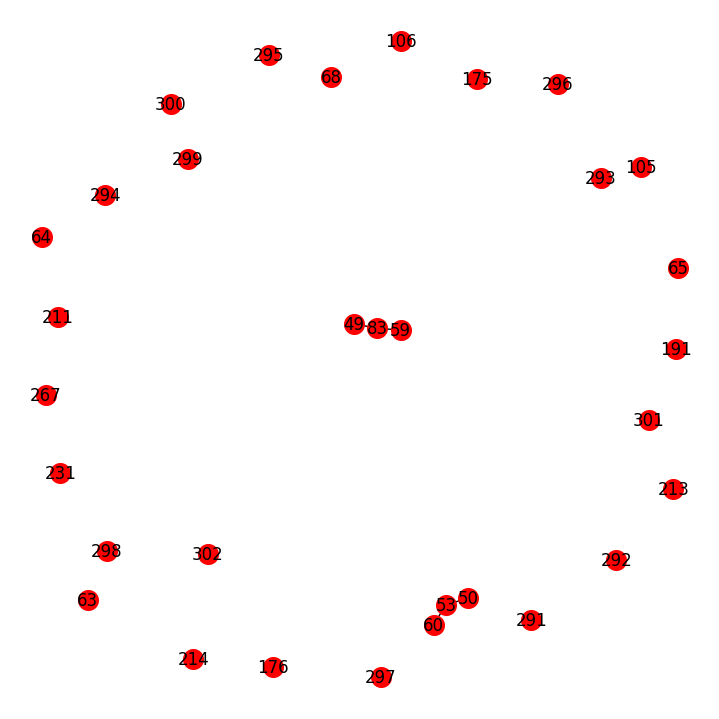

In [82]:
# Subgraph of Most Central Individuals
plt.figure(figsize=(7,7))
G = net.Graph(n2_ud)

nodes = G.nodes()
edges = G.edges()

H = net.path_graph(903)
H.add_nodes_from(G)
H.add_edges_from(G.edges())

H2 = H.subgraph(TopNodes)
#centralcenter = net.center(H2)
net.is_connected(G)
#connected_components(G)
components = list(H.subgraph(c) for c in net.connected_components(H))
net.draw(H2, with_labels=True, node_color = "r", node_size = 200)
#net.draw(n1_ud, pos, cmap=plt.get_cmap('jet'), node_color = values, node_size=200, with_labels=True)

Conclusion:


Overall, the network appears to have some highly connected nodes with relatively high degree centrality and closeness centrality. However, the absence of non-zero betweenness centrality values indicates that there may not be significant bottlenecks or nodes that play a crucial role in the flow of information or influence within the network.